# Exploration of traffic flow data set

* Lets start with the detectors. UOA = detectors can measure multiple lines -> Link files
*

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

In [3]:
det = gpd.read_file('detectors_public.csv')

det.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat,geometry
0,U1-52G,0.196036689548578,0.005511921838942,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,72,10.8895527,48.359957,None
1,U1-51G,0.130039071784385,0.004013209518671,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,73,10.889601,48.3599454,None
2,U1-52L,0.155863214591286,0.022227823915315,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,70,10.8893555,48.3598759,None
3,U1-51L,0.197675412740605,0.021889369247481,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,71,10.8893958,48.3598617,None
4,U1-62,0.065182655061287,0.024465133197684,secondary,RosenaustraÃŸe,50,augsburg,1,68,10.8893609,48.3605781,None


In [4]:
det_gdf = gpd.GeoDataFrame(
    det, geometry=gpd.points_from_xy(det.long, det.lat), crs="EPSG:4326"
)
det_gdf.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat,geometry
0,U1-52G,0.196036689548578,0.005511921838942,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,72,10.8895527,48.359957,POINT (10.88955 48.35996)
1,U1-51G,0.130039071784385,0.004013209518671,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,73,10.889601,48.3599454,POINT (10.88960 48.35995)
2,U1-52L,0.155863214591286,0.022227823915315,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,70,10.8893555,48.3598759,POINT (10.88936 48.35988)
3,U1-51L,0.197675412740605,0.021889369247481,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,71,10.8893958,48.3598617,POINT (10.88940 48.35986)
4,U1-62,0.065182655061287,0.024465133197684,secondary,RosenaustraÃŸe,50,augsburg,1,68,10.8893609,48.3605781,POINT (10.88936 48.36058)


In [11]:
det_city = det_gdf.groupby('citycode')
det_city.count()[det_city.count()['detid']>500]


,detid,length,pos,fclass,road,limit,lanes,linkid,long,lat,geometry
citycode,,,,,,,,,,,
augsburg,717,717,717,717,717,717,717,717,717,717,717
bern,755,755,755,755,755,755,755,755,755,755,755
bremen,548,548,548,548,548,548,548,548,548,548,548
kassel,513,513,513,513,513,513,513,513,513,513,513
london,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719
losanageles,1725,1725,1725,1725,1725,1725,1725,1725,1725,1725,1725
madrid,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116
melbourne,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630
munich,520,520,520,520,520,520,520,520,520,520,520


In [7]:
det_gdf['citycode'].unique()

array(['augsburg', 'basel', 'bern', 'birmingham', 'bolton', 'bordeaux',
       'bremen', 'cagliari', 'constance', 'darmstadt', 'essen',
       'frankfurt', 'graz', 'groningen', 'hamburg', 'innsbruck', 'kassel',
       'london', 'losanageles', 'luzern', 'madrid', 'melbourne',
       'manchester', 'marseille', 'munich', 'paris', 'rotterdam',
       'santander', 'speyer', 'strasbourg', 'stuttgart', 'taipeh',
       'tokyo', 'torino', 'toronto', 'toulouse', 'utrecht', 'vilnius',
       'wolfsburg', 'zurich'], dtype=object)

## Here I want to do a quick and dirty casestudy on Utrecht
### Goals:
1. Show detectors.
2. Lanes they detect.
3. Explore for one detector the flow data

In [ ]:
det_city.get_group('utrecht').plot()

Lets get the streets (links)

In [ ]:
links = pd.read_csv('links.csv')
links_gdf = gpd.GeoDataFrame(
    links, geometry=gpd.points_from_xy(links.long, links.lat), crs="EPSG:4326"
)
links_gdf.head()

In [ ]:
links_city = links_gdf.groupby('citycode')

fig, ax = plt.subplots(1,1)
links_city.get_group('utrecht').plot(ax = ax, markersize=4, label='links')
det_city.get_group('utrecht').plot(ax = ax, c='red',  markersize=6, label='detectors')
ctx.add_basemap(ax, crs=links_city.get_group('utrecht').crs)
plt.legend()


Challenge:
* Detector observations must be grouped by links. -> Observational unit = Links.
* Links must be mapped to Parking spots

## Preprocess the flow data

In [10]:
flow = pd.read_csv('utd19_u.csv')
flow.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_31172\1624543234.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  flow = pd.read_csv('utd19_u.csv')


,day,interval,detid,flow,occ,error,city,speed
0,2017-05-06,0,06.X-2li,12.0,0.0,1.0,augsburg,NaN
1,2017-05-06,300,06.X-2li,12.0,0.0,1.0,augsburg,NaN
2,2017-05-06,600,06.X-2li,12.0,0.0,1.0,augsburg,NaN
3,2017-05-06,900,06.X-2li,16.0,0.0,1.0,augsburg,NaN
4,2017-05-06,1200,06.X-2li,16.0,0.0,1.0,augsburg,NaN


In [13]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134380371 entries, 0 to 134380370
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   day       object 
 1   interval  int64  
 2   detid     object 
 3   flow      float64
 4   occ       float64
 5   error     float64
 6   city      object 
 7   speed     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 8.0+ GB


In [15]:
flow.isna().sum() /flow.shape[0]

day         0.000000
interval    0.000000
detid       0.000000
flow        0.000000
occ         0.024405
error       0.440492
city        0.000000
speed       0.965546
dtype: float64

Conclusion:
* speed almost no data entries occuring -> Leave out in analysis.

Further we have to ealier split the analysis into the cities of interest otherwise the analysis is not managable.

In [24]:
day_detect = flow.groupby(['city', 'detid'])['day'].nunique()
day_detect = day_detect.reset_index(name='count')

<Axes: ylabel='city'>

<Figure size 3000x1000 with 0 Axes>

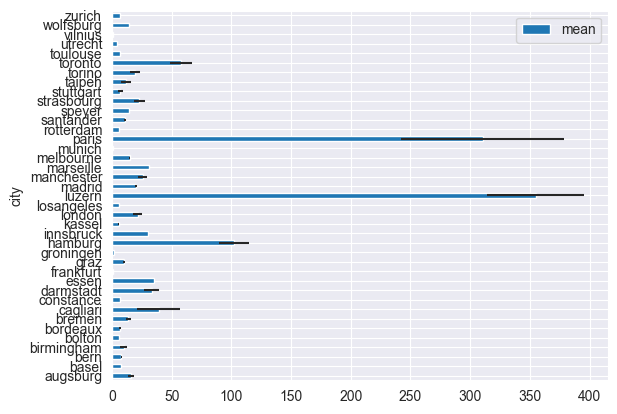

In [35]:
day_mean = day_detect.groupby('city')['count'].agg(['mean', 'std'])

plt.figure(figsize=(30,10))
day_mean.plot(kind='barh', xerr='std')

In [40]:
day_mean[day_mean['mean']>10].sort_values(by='mean', ascending=False)

,mean,std
city,,
luzern,354.930380,40.654379
paris,310.502392,68.192891
hamburg,102.574163,12.610775
toronto,57.845745,8.989753
cagliari,39.394737,17.980548
essen,35.000000,0.000000
darmstadt,33.395408,6.177616
marseille,31.000000,0.000000
innsbruck,30.000000,0.000000


In [112]:
cities_int = ['paris','taipeh', 'toronto', 'melbourne', 'hamburg', 'london' ]
day_mean.loc[cities_int, :]

,mean,std
city,,
paris,310.502392,68.192891
taipeh,11.937079,4.067626
toronto,57.845745,8.989753
melbourne,14.976939,0.316547
hamburg,102.574163,12.610775
london,21.502186,3.436775


In [49]:
det_city = day_detect.groupby('city')['detid'].count()

det_city.sort_values(ascending=False)

city
london        5719
losangeles    1722
madrid        1118
utrecht       1027
zurich        1020
melbourne      954
bern           755
augsburg       713
vilnius        583
bremen         548
munich         521
kassel         505
toulouse       479
taipeh         445
bordeaux       425
hamburg        418
torino         400
darmstadt      392
graz           300
stuttgart      300
rotterdam      259
santander      221
paris          209
toronto        188
speyer         184
manchester     181
marseille      169
bolton         166
luzern         158
strasbourg     154
cagliari       152
wolfsburg      133
constance      122
frankfurt      112
basel           77
groningen       55
birmingham      52
essen           36
innsbruck       16
Name: detid, dtype: int64

In [61]:
det_sum = day_mean.merge(det_city, on='city')

plt.figure(figsize=(20,10))
det_sum.loc[cities_int,['mean', 'detid']]

,mean,detid
city,,
paris,310.502392,209
taipeh,11.937079,445
toronto,57.845745,188
melbourne,14.976939,954
augsburg,15.924264,713
london,21.502186,5719


<Figure size 2000x1000 with 0 Axes>

In [63]:
# to make a decision I multiply number of detectors with number of measurement days. This will resolve the tradeoff partially
det_sum['det_day']= det_sum['mean'] * det_sum['detid']

det_sum.sort_values(by='det_day', ascending = False)

,mean,std,detid,det_day
city,,,,
london,21.502186,3.436775,5719,122971.0
paris,310.502392,68.192891,209,64895.0
luzern,354.930380,40.654379,158,56079.0
hamburg,102.574163,12.610775,418,42876.0
madrid,19.912343,0.948735,1118,22262.0
melbourne,14.976939,0.316547,954,14288.0
darmstadt,33.395408,6.177616,392,13091.0
augsburg,15.924264,2.406076,713,11354.0
toronto,57.845745,8.989753,188,10875.0


Hamburg scores better then Augsburg why it is exchanged.The final cities are: cities_int = ['paris','taipeh', 'toronto', 'melbourne', 'hamburg', 'london' ]

No we bin the flows into hourly averages. ... Good luck with that.

In [70]:
flow['interval'] = pd.to_numeric(flow['interval'], errors='coerce')

In [72]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134380371 entries, 0 to 134380370
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   day       object 
 1   interval  float64
 2   detid     object 
 3   flow      float64
 4   occ       float64
 5   error     float64
 6   city      object 
 7   speed     float64
dtypes: float64(5), object(3)
memory usage: 8.0+ GB


In [76]:
flow.head()

,day,interval,detid,flow,occ,error,city,speed
0,2017-05-06,0.0,06.X-2li,12.0,0.0,1.0,augsburg,NaN
1,2017-05-06,300.0,06.X-2li,12.0,0.0,1.0,augsburg,NaN
2,2017-05-06,600.0,06.X-2li,12.0,0.0,1.0,augsburg,NaN
3,2017-05-06,900.0,06.X-2li,16.0,0.0,1.0,augsburg,NaN
4,2017-05-06,1200.0,06.X-2li,16.0,0.0,1.0,augsburg,NaN


In [78]:
flow['rounded_interval'] = (flow['interval'] // 3600) * 3600

flow.head()

,day,interval,detid,flow,occ,error,city,speed,rounded_interval
0,2017-05-06,0.0,06.X-2li,12.0,0.0,1.0,augsburg,NaN,0.0
1,2017-05-06,300.0,06.X-2li,12.0,0.0,1.0,augsburg,NaN,0.0
2,2017-05-06,600.0,06.X-2li,12.0,0.0,1.0,augsburg,NaN,0.0
3,2017-05-06,900.0,06.X-2li,16.0,0.0,1.0,augsburg,NaN,0.0
4,2017-05-06,1200.0,06.X-2li,16.0,0.0,1.0,augsburg,NaN,0.0


In [81]:
# Group by 'detid' and 'rounded_interval', then calculate mean, std, and count
result_df = flow.groupby(['detid', 'rounded_interval'])['flow'].agg(['mean', 'std', 'count']).reset_index()

# Rename columns for clarity
result_df.columns = ['detid', 'interval', 'mean_flow', 'std_flow', 'count_flow']

In [82]:
result_df.head()

,detid,interval,mean_flow,std_flow,count_flow
0,1,0.0,669.654597,864.538286,1229
1,1,3600.0,505.950773,781.726866,1229
2,1,7200.0,360.110578,622.615363,1229
3,1,10800.0,260.755735,470.697989,1226
4,1,14400.0,211.247286,317.837386,1230


In [83]:
result_df['interval'] = result_df['interval'] / 3600

In [87]:
result_df.tail()

,detid,interval,mean_flow,std_flow,count_flow
480190,ig73FD498_D6_d1,19.0,392.142857,155.955998,280
480191,ig73FD498_D6_d1,20.0,268.000000,94.820714,280
480192,ig73FD498_D6_d1,21.0,209.714286,95.818996,280
480193,ig73FD498_D6_d1,22.0,131.142857,63.461508,280
480194,ig73FD498_D6_d1,23.0,73.000000,59.648913,280


In [88]:
result_sum = det_gdf.merge(result_df, left_on= 'detid', right_on='detid')

In [89]:
result_sum.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat,geometry,interval,mean_flow,std_flow,count_flow
0,U1-52G,0.196036689548578,0.005511921838942,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,72,10.8895527,48.359957,POINT (10.88955 48.35996),0.0,62.1875,37.540711,192
1,U1-52G,0.196036689548578,0.005511921838942,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,72,10.8895527,48.359957,POINT (10.88955 48.35996),1.0,47.5625,36.640839,192
2,U1-52G,0.196036689548578,0.005511921838942,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,72,10.8895527,48.359957,POINT (10.88955 48.35996),2.0,37.5625,35.267360,192
3,U1-52G,0.196036689548578,0.005511921838942,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,72,10.8895527,48.359957,POINT (10.88955 48.35996),3.0,34.6875,31.057222,192
4,U1-52G,0.196036689548578,0.005511921838942,secondary,GÃ¶gginger StraÃŸe,50,augsburg,1,72,10.8895527,48.359957,POINT (10.88955 48.35996),4.0,39.9375,23.710211,192


In [91]:
result_sum.drop(columns= ['long','lat'], inplace = True)

In [93]:
result_sum['interval'] = result_sum['interval'].astype(int)

In [94]:
result_sum.to_csv('detector_mean_hour.csv')

Lets do some GENERAL EDA

In [98]:
plot_df = result_sum.groupby(['citycode', 'interval' ])['mean_flow'].mean().reset_index()

In [108]:
plot_df[plot_df[.isin(cities_int)]

,citycode,interval,mean_flow
0,augsburg,NaN,NaN
1,augsburg,NaN,NaN
2,augsburg,NaN,NaN
3,augsburg,NaN,NaN
4,augsburg,NaN,NaN
...,...,...,...
962,NaN,NaN,NaN
963,NaN,NaN,NaN
964,NaN,NaN,NaN
965,NaN,NaN,NaN


Text(0.5, 1.0, 'Mean traffic flow (cars/h) for hours after midnight')

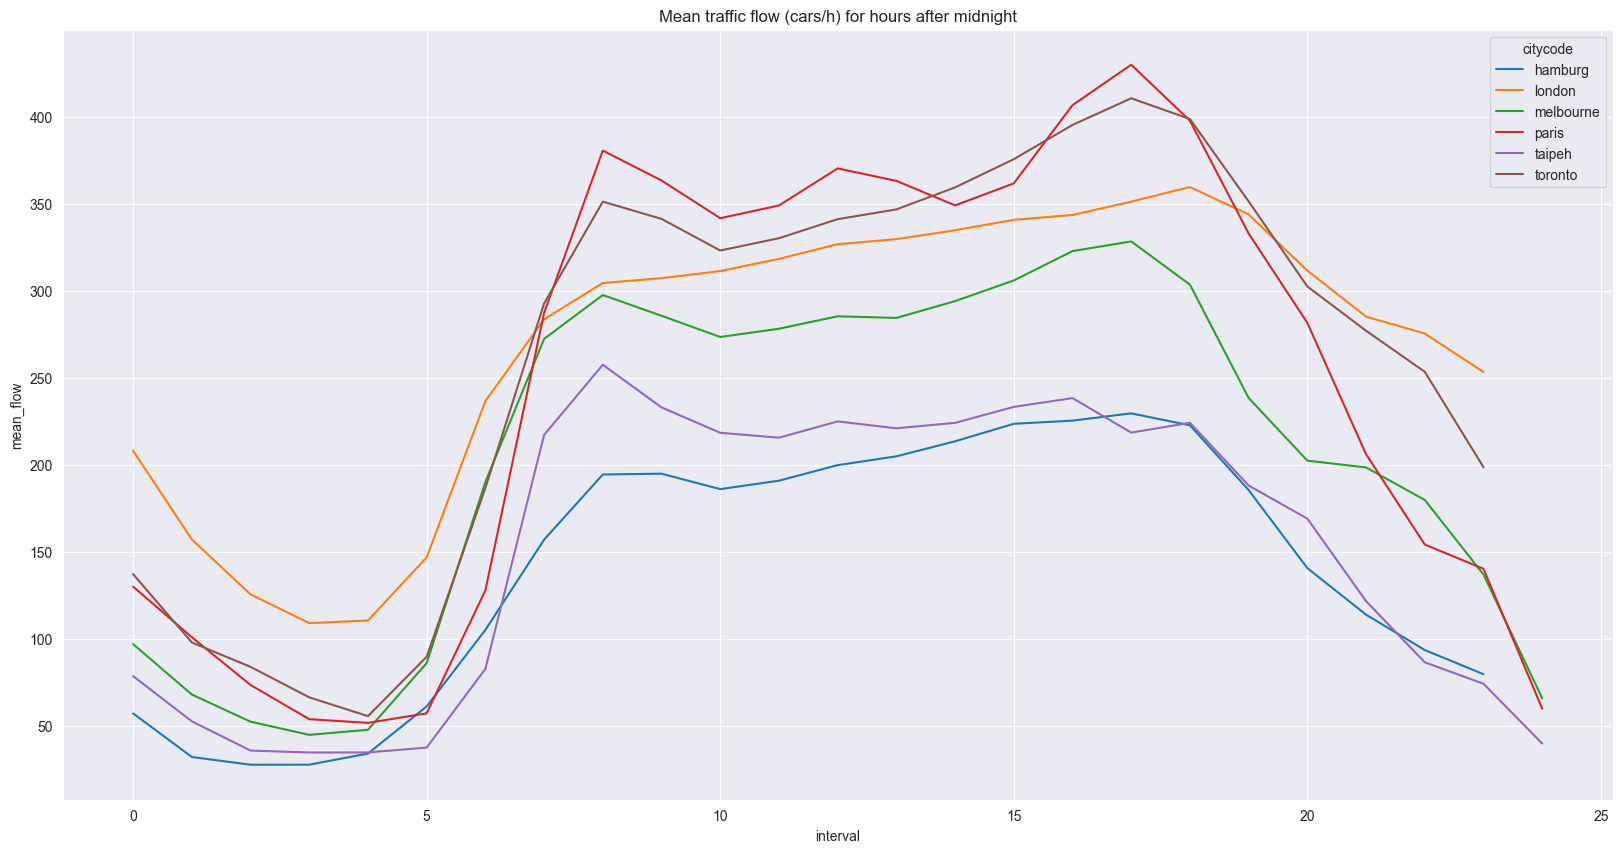

In [113]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = plot_df[plot_df['citycode'].isin(cities_int)], x='interval', y= 'mean_flow', hue='citycode')
plt.title('Mean traffic flow (cars/h) for hours after midnight')